In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from lightgbm import LGBMRegressor
from mlflow import log_metric, log_param, log_artifacts
import mlflow
import mlflow.lightgbm
import lightgbm as lgb

from sklearn.model_selection import TimeSeriesSplit

In [3]:
ID_COL,TARGET_COL = 'ID','Close'

/Users/rgarzon/anaconda3/envs/vinya/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred) ** 0.5

In [5]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
#  from google.colab import files
#  files.download(file_name)

In [44]:
ss = pd.read_csv('./content/SampleSubmission_ZxsCq0O.csv')
train = pd.read_csv('./content/Train_awoL0xl.csv')
test = pd.read_csv('./content/Test_QQKW4dv.csv')



In [48]:
from fbprophet import Prophet

for one_stock in range(103):
    print (one_stock)
    d = {'y': train[train['stock']==one_stock]['Close'],'ds' : train[train['stock']==one_stock]['Date']}
    df = pd.DataFrame(d)   
    model = Prophet()
    model.fit(df)                
    d = {'ds' : test[test['stock']==one_stock]['Date']}
    future = pd.DataFrame(d)
    forecast = model.predict(future)
    #print (forecast['yhat'])
    test.loc[test['stock']==one_stock,'Close'] = forecast['yhat'].values
    #print (test[test['stock']==one_stock]['Close'])
    print (test[test['stock']==one_stock].head)
    print ("************************")

/Users/rgarzon/anaconda3/envs/vinya/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of         ID  stock        Date  holiday  unpredictability_score       Close
0   id_713      0  2019-11-01        0                       7  119.868441
1   id_714      0  2019-11-04        0                       7  120.542837
2   id_715      0  2019-11-05        0                       7  120.903800
3   id_716      0  2019-11-06        0                       7  121.169006
4   id_717      0  2019-11-07        0                       7  121.551232
5   id_718      0  2019-11-08        0                       7  121.936495
6   id_719      0  2019-11-11        1                       7  122.732243
7   id_720      0  2019-11-12        0                       7  123.120169
8   id_721      0  2019-11-13        0                       7  123.404812
9   id_722      0  2019-11-14        0                       7  123.798600
10  id_723      0  2019-11-15        0                       7  124.187292
11  id_724      0  2019-11-18        0                       7  124.94

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of          ID  stock        Date  holiday  unpredictability_score      Close
41  id_1467      1  2019-11-01        0                       0  45.511554
42  id_1468      1  2019-11-04        0                       0  45.404038
43  id_1469      1  2019-11-05        0                       0  45.399070
44  id_1470      1  2019-11-06        0                       0  45.356842
45  id_1471      1  2019-11-07        0                       0  45.311158
46  id_1472      1  2019-11-08        0                       0  45.275817
47  id_1473      1  2019-11-11        1                       0  45.175373
48  id_1474      1  2019-11-12        0                       0  45.178200
49  id_1475      1  2019-11-13        0                       0  45.146300
50  id_1476      1  2019-11-14        0                       0  45.113276
51  id_1477      1  2019-11-15        0                       0  45.092668
52  id_1478      1  2019-11-18        0                       0  45.04

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score       Close
82   id_2221      2  2019-11-01        0                       3  149.396371
83   id_2222      2  2019-11-04        0                       3  149.418774
84   id_2223      2  2019-11-05        0                       3  149.448348
85   id_2224      2  2019-11-06        0                       3  149.477918
86   id_2225      2  2019-11-07        0                       3  149.528909
87   id_2226      2  2019-11-08        0                       3  149.565793
88   id_2227      2  2019-11-11        1                       3  149.621494
89   id_2228      2  2019-11-12        0                       3  149.658935
90   id_2229      2  2019-11-13        0                       3  149.694682
91   id_2230      2  2019-11-14        0                       3  149.750178
92   id_2231      2  2019-11-15        0                       3  149.789949
93   id_2232      2  2019-11-18        0      

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
123  id_2975      3  2019-11-01        0                       2  73.085610
124  id_2976      3  2019-11-04        0                       2  73.095140
125  id_2977      3  2019-11-05        0                       2  73.129694
126  id_2978      3  2019-11-06        0                       2  73.157074
127  id_2979      3  2019-11-07        0                       2  73.134037
128  id_2980      3  2019-11-08        0                       2  73.218765
129  id_2981      3  2019-11-11        1                       2  73.227463
130  id_2982      3  2019-11-12        0                       2  73.272007
131  id_2983      3  2019-11-13        0                       2  73.314028
132  id_2984      3  2019-11-14        0                       2  73.309756
133  id_2985      3  2019-11-15        0                       2  73.416718
134  id_2986      3  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
164  id_3729      4  2019-11-01        0                       7  63.466700
165  id_3730      4  2019-11-04        0                       7  63.243076
166  id_3731      4  2019-11-05        0                       7  63.273668
167  id_3732      4  2019-11-06        0                       7  63.101399
168  id_3733      4  2019-11-07        0                       7  62.894590
169  id_3734      4  2019-11-08        0                       7  62.857604
170  id_3735      4  2019-11-11        1                       7  62.683679
171  id_3736      4  2019-11-12        0                       7  62.721270
172  id_3737      4  2019-11-13        0                       7  62.551417
173  id_3738      4  2019-11-14        0                       7  62.342627
174  id_3739      4  2019-11-15        0                       7  62.299477
175  id_3740      4  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score       Close
205  id_4483      5  2019-11-01        0                       9  146.447991
206  id_4484      5  2019-11-04        0                       9  145.596624
207  id_4485      5  2019-11-05        0                       9  145.989975
208  id_4486      5  2019-11-06        0                       9  146.150058
209  id_4487      5  2019-11-07        0                       9  146.088521
210  id_4488      5  2019-11-08        0                       9  145.870968
211  id_4489      5  2019-11-11        1                       9  144.680748
212  id_4490      5  2019-11-12        0                       9  145.019360
213  id_4491      5  2019-11-13        0                       9  145.157432
214  id_4492      5  2019-11-14        0                       9  145.107031
215  id_4493      5  2019-11-15        0                       9  144.932937
216  id_4494      5  2019-11-18        0      

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score       Close
246  id_5237      6  2019-11-01        0                       6  125.344633
247  id_5238      6  2019-11-04        0                       6  125.399593
248  id_5239      6  2019-11-05        0                       6  125.459995
249  id_5240      6  2019-11-06        0                       6  125.564456
250  id_5241      6  2019-11-07        0                       6  125.636201
251  id_5242      6  2019-11-08        0                       6  125.695570
252  id_5243      6  2019-11-11        1                       6  125.913692
253  id_5244      6  2019-11-12        0                       6  126.024997
254  id_5245      6  2019-11-13        0                       6  126.177918
255  id_5246      6  2019-11-14        0                       6  126.295261
256  id_5247      6  2019-11-15        0                       6  126.396954
257  id_5248      6  2019-11-18        0      

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score       Close
287  id_5991      7  2019-11-01        0                       6  150.377986
288  id_5992      7  2019-11-04        0                       6  150.185973
289  id_5993      7  2019-11-05        0                       6  150.269072
290  id_5994      7  2019-11-06        0                       6  150.264235
291  id_5995      7  2019-11-07        0                       6  150.113374
292  id_5996      7  2019-11-08        0                       6  150.215651
293  id_5997      7  2019-11-11        1                       6  149.889111
294  id_5998      7  2019-11-12        0                       6  149.946981
295  id_5999      7  2019-11-13        0                       6  149.927865
296  id_6000      7  2019-11-14        0                       6  149.773841
297  id_6001      7  2019-11-15        0                       6  149.883879
298  id_6002      7  2019-11-18        0      

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
328  id_6745      8  2019-11-01        0                       0  61.580385
329  id_6746      8  2019-11-04        0                       0  61.405019
330  id_6747      8  2019-11-05        0                       0  61.395616
331  id_6748      8  2019-11-06        0                       0  61.332828
332  id_6749      8  2019-11-07        0                       0  61.253226
333  id_6750      8  2019-11-08        0                       0  61.197541
334  id_6751      8  2019-11-11        1                       0  61.012067
335  id_6752      8  2019-11-12        0                       0  61.010102
336  id_6753      8  2019-11-13        0                       0  60.960029
337  id_6754      8  2019-11-14        0                       0  60.898146
338  id_6755      8  2019-11-15        0                       0  60.864796
339  id_6756      8  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score       Close
369  id_7499      9  2019-11-01        0                       8  185.368294
370  id_7500      9  2019-11-04        0                       8  185.143425
371  id_7501      9  2019-11-05        0                       8  185.300231
372  id_7502      9  2019-11-06        0                       8  185.335750
373  id_7503      9  2019-11-07        0                       8  185.247407
374  id_7504      9  2019-11-08        0                       8  185.360255
375  id_7505      9  2019-11-11        1                       8  185.205301
376  id_7506      9  2019-11-12        0                       8  185.415276
377  id_7507      9  2019-11-13        0                       8  185.518274
378  id_7508      9  2019-11-14        0                       8  185.510563
379  id_7509      9  2019-11-15        0                       8  185.715522
380  id_7510      9  2019-11-18        0      

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
410  id_8253     10  2019-11-01        0                       1  55.918479
411  id_8254     10  2019-11-04        0                       1  55.908667
412  id_8255     10  2019-11-05        0                       1  55.948155
413  id_8256     10  2019-11-06        0                       1  55.973708
414  id_8257     10  2019-11-07        0                       1  55.981216
415  id_8258     10  2019-11-08        0                       1  56.068269
416  id_8259     10  2019-11-11        1                       1  56.109335
417  id_8260     10  2019-11-12        0                       1  56.168848
418  id_8261     10  2019-11-13        0                       1  56.215563
419  id_8262     10  2019-11-14        0                       1  56.245038
420  id_8263     10  2019-11-15        0                       1  56.354481
421  id_8264     10  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
451  id_9007     11  2019-11-01        0                       3  88.972548
452  id_9008     11  2019-11-04        0                       3  89.091942
453  id_9009     11  2019-11-05        0                       3  89.110306
454  id_9010     11  2019-11-06        0                       3  89.234290
455  id_9011     11  2019-11-07        0                       3  89.202962
456  id_9012     11  2019-11-08        0                       3  89.304740
457  id_9013     11  2019-11-11        1                       3  89.469061
458  id_9014     11  2019-11-12        0                       3  89.510020
459  id_9015     11  2019-11-13        0                       3  89.659652
460  id_9016     11  2019-11-14        0                       3  89.656374
461  id_9017     11  2019-11-15        0                       3  89.787846
462  id_9018     11  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of           ID  stock        Date  holiday  unpredictability_score      Close
492  id_9761     12  2019-11-01        0                       9  88.295676
493  id_9762     12  2019-11-04        0                       9  88.088416
494  id_9763     12  2019-11-05        0                       9  88.141988
495  id_9764     12  2019-11-06        0                       9  88.109501
496  id_9765     12  2019-11-07        0                       9  88.163580
497  id_9766     12  2019-11-08        0                       9  88.045623
498  id_9767     12  2019-11-11        1                       9  87.854958
499  id_9768     12  2019-11-12        0                       9  87.936555
500  id_9769     12  2019-11-13        0                       9  87.942440
501  id_9770     12  2019-11-14        0                       9  88.044269
502  id_9771     12  2019-11-15        0                       9  87.982210
503  id_9772     12  2019-11-18        0                  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
533  id_10515     13  2019-11-01        0                       5  62.506247
534  id_10516     13  2019-11-04        0                       5  62.448428
535  id_10517     13  2019-11-05        0                       5  62.506517
536  id_10518     13  2019-11-06        0                       5  62.523419
537  id_10519     13  2019-11-07        0                       5  62.542802
538  id_10520     13  2019-11-08        0                       5  62.593828
539  id_10521     13  2019-11-11        1                       5  62.601736
540  id_10522     13  2019-11-12        0                       5  62.696621
541  id_10523     13  2019-11-13        0                       5  62.756862
542  id_10524     13  2019-11-14        0                       5  62.825283
543  id_10525     13  2019-11-15        0                       5  62.930014
544  id_10526     13  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
574  id_11269     14  2019-11-01        0                       2  76.715654
575  id_11270     14  2019-11-04        0                       2  76.602714
576  id_11271     14  2019-11-05        0                       2  76.607191
577  id_11272     14  2019-11-06        0                       2  76.562707
578  id_11273     14  2019-11-07        0                       2  76.519330
579  id_11274     14  2019-11-08        0                       2  76.507318
580  id_11275     14  2019-11-11        1                       2  76.379704
581  id_11276     14  2019-11-12        0                       2  76.384468
582  id_11277     14  2019-11-13        0                       2  76.342818
583  id_11278     14  2019-11-14        0                       2  76.304711
584  id_11279     14  2019-11-15        0                       2  76.300235
585  id_11280     14  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
615  id_12023     15  2019-11-01        0                       0  64.102328
616  id_12024     15  2019-11-04        0                       0  64.120258
617  id_12025     15  2019-11-05        0                       0  64.123756
618  id_12026     15  2019-11-06        0                       0  64.130430
619  id_12027     15  2019-11-07        0                       0  64.139785
620  id_12028     15  2019-11-08        0                       0  64.158444
621  id_12029     15  2019-11-11        1                       0  64.190683
622  id_12030     15  2019-11-12        0                       0  64.195703
623  id_12031     15  2019-11-13        0                       0  64.202201
624  id_12032     15  2019-11-14        0                       0  64.209712
625  id_12033     15  2019-11-15        0                       0  64.224932
626  id_12034     15  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
656  id_12777     16  2019-11-01        0                       5  66.038205
657  id_12778     16  2019-11-04        0                       5  66.029595
658  id_12779     16  2019-11-05        0                       5  66.092641
659  id_12780     16  2019-11-06        0                       5  66.101812
660  id_12781     16  2019-11-07        0                       5  66.166354
661  id_12782     16  2019-11-08        0                       5  66.247067
662  id_12783     16  2019-11-11        1                       5  66.243718
663  id_12784     16  2019-11-12        0                       5  66.312102
664  id_12785     16  2019-11-13        0                       5  66.328739
665  id_12786     16  2019-11-14        0                       5  66.402927
666  id_12787     16  2019-11-15        0                       5  66.495408
667  id_12788     16  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
697  id_13531     17  2019-11-01        0                       0  57.566113
698  id_13532     17  2019-11-04        0                       0  57.525644
699  id_13533     17  2019-11-05        0                       0  57.541705
700  id_13534     17  2019-11-06        0                       0  57.544996
701  id_13535     17  2019-11-07        0                       0  57.543272
702  id_13536     17  2019-11-08        0                       0  57.514084
703  id_13537     17  2019-11-11        1                       0  57.486821
704  id_13538     17  2019-11-12        0                       0  57.504166
705  id_13539     17  2019-11-13        0                       0  57.507129
706  id_13540     17  2019-11-14        0                       0  57.503514
707  id_13541     17  2019-11-15        0                       0  57.470970
708  id_13542     17  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
738  id_14285     18  2019-11-01        0                       7  80.096005
739  id_14286     18  2019-11-04        0                       7  80.023229
740  id_14287     18  2019-11-05        0                       7  80.114858
741  id_14288     18  2019-11-06        0                       7  80.160793
742  id_14289     18  2019-11-07        0                       7  80.187856
743  id_14290     18  2019-11-08        0                       7  80.253574
744  id_14291     18  2019-11-11        1                       7  80.169668
745  id_14292     18  2019-11-12        0                       7  80.271493
746  id_14293     18  2019-11-13        0                       7  80.334825
747  id_14294     18  2019-11-14        0                       7  80.386233
748  id_14295     18  2019-11-15        0                       7  80.482718
749  id_14296     18  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score       Close
779  id_15039     19  2019-11-01        0                       4  118.462187
780  id_15040     19  2019-11-04        0                       4  118.306675
781  id_15041     19  2019-11-05        0                       4  118.330251
782  id_15042     19  2019-11-06        0                       4  118.358969
783  id_15043     19  2019-11-07        0                       4  118.220865
784  id_15044     19  2019-11-08        0                       4  118.339372
785  id_15045     19  2019-11-11        1                       4  118.246985
786  id_15046     19  2019-11-12        0                       4  118.306812
787  id_15047     19  2019-11-13        0                       4  118.378465
788  id_15048     19  2019-11-14        0                       4  118.289074
789  id_15049     19  2019-11-15        0                       4  118.460958
790  id_15050     19  2019-11-18  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
820  id_15793     20  2019-11-01        0                       3  69.268302
821  id_15794     20  2019-11-04        0                       3  69.291742
822  id_15795     20  2019-11-05        0                       3  69.356193
823  id_15796     20  2019-11-06        0                       3  69.411961
824  id_15797     20  2019-11-07        0                       3  69.394214
825  id_15798     20  2019-11-08        0                       3  69.500309
826  id_15799     20  2019-11-11        1                       3  69.503737
827  id_15800     20  2019-11-12        0                       3  69.563773
828  id_15801     20  2019-11-13        0                       3  69.616689
829  id_15802     20  2019-11-14        0                       3  69.597789
830  id_15803     20  2019-11-15        0                       3  69.704475
831  id_15804     20  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
861  id_16547     21  2019-11-01        0                       5  61.731977
862  id_16548     21  2019-11-04        0                       5  61.719398
863  id_16549     21  2019-11-05        0                       5  61.771027
864  id_16550     21  2019-11-06        0                       5  61.744374
865  id_16551     21  2019-11-07        0                       5  61.658724
866  id_16552     21  2019-11-08        0                       5  61.631455
867  id_16553     21  2019-11-11        1                       5  61.505605
868  id_16554     21  2019-11-12        0                       5  61.528061
869  id_16555     21  2019-11-13        0                       5  61.477270
870  id_16556     21  2019-11-14        0                       5  61.372717
871  id_16557     21  2019-11-15        0                       5  61.331809
872  id_16558     21  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
902  id_17301     22  2019-11-01        0                       3  53.215885
903  id_17302     22  2019-11-04        0                       3  53.245697
904  id_17303     22  2019-11-05        0                       3  53.299301
905  id_17304     22  2019-11-06        0                       3  53.334492
906  id_17305     22  2019-11-07        0                       3  53.337108
907  id_17306     22  2019-11-08        0                       3  53.401074
908  id_17307     22  2019-11-11        1                       3  53.383415
909  id_17308     22  2019-11-12        0                       3  53.426429
910  id_17309     22  2019-11-13        0                       3  53.453446
911  id_17310     22  2019-11-14        0                       3  53.450087
912  id_17311     22  2019-11-15        0                       3  53.510005
913  id_17312     22  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of            ID  stock        Date  holiday  unpredictability_score      Close
943  id_18055     23  2019-11-01        0                       0  57.599509
944  id_18056     23  2019-11-04        0                       0  57.552403
945  id_18057     23  2019-11-05        0                       0  57.553377
946  id_18058     23  2019-11-06        0                       0  57.559844
947  id_18059     23  2019-11-07        0                       0  57.543911
948  id_18060     23  2019-11-08        0                       0  57.544980
949  id_18061     23  2019-11-11        1                       0  57.494221
950  id_18062     23  2019-11-12        0                       0  57.495155
951  id_18063     23  2019-11-13        0                       0  57.502118
952  id_18064     23  2019-11-14        0                       0  57.487184
953  id_18065     23  2019-11-15        0                       0  57.489718
954  id_18066     23  2019-11-18        0     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
984   id_18809     24  2019-11-01        0                       6  108.264224
985   id_18810     24  2019-11-04        0                       6  108.438323
986   id_18811     24  2019-11-05        0                       6  108.501457
987   id_18812     24  2019-11-06        0                       6  108.619787
988   id_18813     24  2019-11-07        0                       6  108.708340
989   id_18814     24  2019-11-08        0                       6  108.789608
990   id_18815     24  2019-11-11        1                       6  108.968764
991   id_18816     24  2019-11-12        0                       6  109.040956
992   id_18817     24  2019-11-13        0                       6  109.172162
993   id_18818     24  2019-11-14        0                       6  109.277271
994   id_18819     24  2019-11-15        0                       6  109.378487
995   id_18820     24 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1025  id_19563     25  2019-11-01        0                       2  49.193653
1026  id_19564     25  2019-11-04        0                       2  49.167159
1027  id_19565     25  2019-11-05        0                       2  49.172890
1028  id_19566     25  2019-11-06        0                       2  49.167856
1029  id_19567     25  2019-11-07        0                       2  49.165858
1030  id_19568     25  2019-11-08        0                       2  49.194899
1031  id_19569     25  2019-11-11        1                       2  49.178871
1032  id_19570     25  2019-11-12        0                       2  49.190368
1033  id_19571     25  2019-11-13        0                       2  49.192592
1034  id_19572     25  2019-11-14        0                       2  49.199524
1035  id_19573     25  2019-11-15        0                       2  49.239302
1036  id_19574     25  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1066  id_20317     26  2019-11-01        0                       7  66.112208
1067  id_20318     26  2019-11-04        0                       7  65.989381
1068  id_20319     26  2019-11-05        0                       7  66.017944
1069  id_20320     26  2019-11-06        0                       7  66.014071
1070  id_20321     26  2019-11-07        0                       7  65.756386
1071  id_20322     26  2019-11-08        0                       7  66.004347
1072  id_20323     26  2019-11-11        1                       7  66.309609
1073  id_20324     26  2019-11-12        0                       7  66.501366
1074  id_20325     26  2019-11-13        0                       7  66.667230
1075  id_20326     26  2019-11-14        0                       7  66.583335
1076  id_20327     26  2019-11-15        0                       7  67.006534
1077  id_20328     26  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1107  id_21071     27  2019-11-01        0                       4  40.371500
1108  id_21072     27  2019-11-04        0                       4  40.320553
1109  id_21073     27  2019-11-05        0                       4  40.333007
1110  id_21074     27  2019-11-06        0                       4  40.265756
1111  id_21075     27  2019-11-07        0                       4  40.275055
1112  id_21076     27  2019-11-08        0                       4  40.348411
1113  id_21077     27  2019-11-11        1                       4  40.140264
1114  id_21078     27  2019-11-12        0                       4  40.079707
1115  id_21079     27  2019-11-13        0                       4  39.931151
1116  id_21080     27  2019-11-14        0                       4  39.852439
1117  id_21081     27  2019-11-15        0                       4  39.832881
1118  id_21082     27  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1148  id_21825     28  2019-11-01        0                       1  27.215054
1149  id_21826     28  2019-11-04        0                       1  27.253511
1150  id_21827     28  2019-11-05        0                       1  27.309875
1151  id_21828     28  2019-11-06        0                       1  27.346720
1152  id_21829     28  2019-11-07        0                       1  27.348719
1153  id_21830     28  2019-11-08        0                       1  27.388035
1154  id_21831     28  2019-11-11        1                       1  27.465715
1155  id_21832     28  2019-11-12        0                       1  27.542270
1156  id_21833     28  2019-11-13        0                       1  27.602370
1157  id_21834     28  2019-11-14        0                       1  27.630209
1158  id_21835     28  2019-11-15        0                       1  27.697367
1159  id_21836     28  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1189  id_22579     29  2019-11-01        0                       0  47.576821
1190  id_22580     29  2019-11-04        0                       0  47.575352
1191  id_22581     29  2019-11-05        0                       0  47.579189
1192  id_22582     29  2019-11-06        0                       0  47.590766
1193  id_22583     29  2019-11-07        0                       0  47.601099
1194  id_22584     29  2019-11-08        0                       0  47.606032
1195  id_22585     29  2019-11-11        1                       0  47.575193
1196  id_22586     29  2019-11-12        0                       0  47.569550
1197  id_22587     29  2019-11-13        0                       0  47.572286
1198  id_22588     29  2019-11-14        0                       0  47.574684
1199  id_22589     29  2019-11-15        0                       0  47.572824
1200  id_22590     29  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1230  id_23333     30  2019-11-01        0                       2  68.220405
1231  id_23334     30  2019-11-04        0                       2  68.112159
1232  id_23335     30  2019-11-05        0                       2  68.071074
1233  id_23336     30  2019-11-06        0                       2  68.044242
1234  id_23337     30  2019-11-07        0                       2  68.011167
1235  id_23338     30  2019-11-08        0                       2  68.024386
1236  id_23339     30  2019-11-11        1                       2  67.959580
1237  id_23340     30  2019-11-12        0                       2  67.937301
1238  id_23341     30  2019-11-13        0                       2  67.930629
1239  id_23342     30  2019-11-14        0                       2  67.918556
1240  id_23343     30  2019-11-15        0                       2  67.953097
1241  id_23344     30  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1271  id_24087     31  2019-11-01        0                       3  80.466144
1272  id_24088     31  2019-11-04        0                       3  79.816847
1273  id_24089     31  2019-11-05        0                       3  79.800837
1274  id_24090     31  2019-11-06        0                       3  79.523699
1275  id_24091     31  2019-11-07        0                       3  79.280983
1276  id_24092     31  2019-11-08        0                       3  79.285869
1277  id_24093     31  2019-11-11        1                       3  78.942195
1278  id_24094     31  2019-11-12        0                       3  79.062213
1279  id_24095     31  2019-11-13        0                       3  78.934947
1280  id_24096     31  2019-11-14        0                       3  78.853412
1281  id_24097     31  2019-11-15        0                       3  79.027922
1282  id_24098     31  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1312  id_24841     32  2019-11-01        0                       5  59.534019
1313  id_24842     32  2019-11-04        0                       5  59.458053
1314  id_24843     32  2019-11-05        0                       5  59.506817
1315  id_24844     32  2019-11-06        0                       5  59.497630
1316  id_24845     32  2019-11-07        0                       5  59.541205
1317  id_24846     32  2019-11-08        0                       5  59.558689
1318  id_24847     32  2019-11-11        1                       5  59.456792
1319  id_24848     32  2019-11-12        0                       5  59.504909
1320  id_24849     32  2019-11-13        0                       5  59.499586
1321  id_24850     32  2019-11-14        0                       5  59.551609
1322  id_24851     32  2019-11-15        0                       5  59.582026
1323  id_24852     32  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1353  id_25595     33  2019-11-01        0                       2  55.453049
1354  id_25596     33  2019-11-04        0                       2  55.141162
1355  id_25597     33  2019-11-05        0                       2  55.076493
1356  id_25598     33  2019-11-06        0                       2  55.002115
1357  id_25599     33  2019-11-07        0                       2  54.835113
1358  id_25600     33  2019-11-08        0                       2  54.804061
1359  id_25601     33  2019-11-11        1                       2  54.528641
1360  id_25602     33  2019-11-12        0                       2  54.492253
1361  id_25603     33  2019-11-13        0                       2  54.453304
1362  id_25604     33  2019-11-14        0                       2  54.328056
1363  id_25605     33  2019-11-15        0                       2  54.344096
1364  id_25606     33  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1394  id_26349     34  2019-11-01        0                       4  85.330811
1395  id_26350     34  2019-11-04        0                       4  85.406183
1396  id_26351     34  2019-11-05        0                       4  85.521194
1397  id_26352     34  2019-11-06        0                       4  85.532019
1398  id_26353     34  2019-11-07        0                       4  85.606931
1399  id_26354     34  2019-11-08        0                       4  85.682565
1400  id_26355     34  2019-11-11        1                       4  85.824199
1401  id_26356     34  2019-11-12        0                       4  85.974332
1402  id_26357     34  2019-11-13        0                       4  86.025733
1403  id_26358     34  2019-11-14        0                       4  86.145686
1404  id_26359     34  2019-11-15        0                       4  86.269626
1405  id_26360     34  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1435  id_27103     35  2019-11-01        0                       1  53.311662
1436  id_27104     35  2019-11-04        0                       1  53.230094
1437  id_27105     35  2019-11-05        0                       1  53.238075
1438  id_27106     35  2019-11-06        0                       1  53.225425
1439  id_27107     35  2019-11-07        0                       1  53.150896
1440  id_27108     35  2019-11-08        0                       1  53.179154
1441  id_27109     35  2019-11-11        1                       1  53.085057
1442  id_27110     35  2019-11-12        0                       1  53.100951
1443  id_27111     35  2019-11-13        0                       1  53.102163
1444  id_27112     35  2019-11-14        0                       1  53.047124
1445  id_27113     35  2019-11-15        0                       1  53.100008
1446  id_27114     35  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1476  id_27857     36  2019-11-01        0                       9  98.327893
1477  id_27858     36  2019-11-04        0                       9  98.149815
1478  id_27859     36  2019-11-05        0                       9  98.309858
1479  id_27860     36  2019-11-06        0                       9  98.373102
1480  id_27861     36  2019-11-07        0                       9  98.559511
1481  id_27862     36  2019-11-08        0                       9  98.646077
1482  id_27863     36  2019-11-11        1                       9  98.360490
1483  id_27864     36  2019-11-12        0                       9  98.507377
1484  id_27865     36  2019-11-13        0                       9  98.569180
1485  id_27866     36  2019-11-14        0                       9  98.765392
1486  id_27867     36  2019-11-15        0                       9  98.872071
1487  id_27868     36  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1517  id_28611     37  2019-11-01        0                       2  80.897039
1518  id_28612     37  2019-11-04        0                       2  80.913565
1519  id_28613     37  2019-11-05        0                       2  80.959188
1520  id_28614     37  2019-11-06        0                       2  80.975826
1521  id_28615     37  2019-11-07        0                       2  81.021393
1522  id_28616     37  2019-11-08        0                       2  81.045347
1523  id_28617     37  2019-11-11        1                       2  81.087002
1524  id_28618     37  2019-11-12        0                       2  81.139840
1525  id_28619     37  2019-11-13        0                       2  81.163223
1526  id_28620     37  2019-11-14        0                       2  81.215141
1527  id_28621     37  2019-11-15        0                       2  81.245125
1528  id_28622     37  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1558  id_29365     38  2019-11-01        0                       1  29.166319
1559  id_29366     38  2019-11-04        0                       1  29.146740
1560  id_29367     38  2019-11-05        0                       1  29.172649
1561  id_29368     38  2019-11-06        0                       1  29.165195
1562  id_29369     38  2019-11-07        0                       1  29.108417
1563  id_29370     38  2019-11-08        0                       1  29.118872
1564  id_29371     38  2019-11-11        1                       1  29.054112
1565  id_29372     38  2019-11-12        0                       1  29.071520
1566  id_29373     38  2019-11-13        0                       1  29.059164
1567  id_29374     38  2019-11-14        0                       1  29.001142
1568  id_29375     38  2019-11-15        0                       1  29.013977
1569  id_29376     38  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1599  id_30119     39  2019-11-01        0                       3  26.284386
1600  id_30120     39  2019-11-04        0                       3  26.466660
1601  id_30121     39  2019-11-05        0                       3  26.510353
1602  id_30122     39  2019-11-06        0                       3  26.600632
1603  id_30123     39  2019-11-07        0                       3  26.634221
1604  id_30124     39  2019-11-08        0                       3  26.768236
1605  id_30125     39  2019-11-11        1                       3  26.931554
1606  id_30126     39  2019-11-12        0                       3  26.973998
1607  id_30127     39  2019-11-13        0                       3  27.065216
1608  id_30128     39  2019-11-14        0                       3  27.101595
1609  id_30129     39  2019-11-15        0                       3  27.239845
1610  id_30130     39  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1640  id_30873     40  2019-11-01        0                       0  45.924373
1641  id_30874     40  2019-11-04        0                       0  45.858782
1642  id_30875     40  2019-11-05        0                       0  45.859917
1643  id_30876     40  2019-11-06        0                       0  45.828844
1644  id_30877     40  2019-11-07        0                       0  45.810847
1645  id_30878     40  2019-11-08        0                       0  45.795697
1646  id_30879     40  2019-11-11        1                       0  45.739642
1647  id_30880     40  2019-11-12        0                       0  45.749017
1648  id_30881     40  2019-11-13        0                       0  45.728486
1649  id_30882     40  2019-11-14        0                       0  45.723115
1650  id_30883     40  2019-11-15        0                       0  45.722404
1651  id_30884     40  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1681  id_31627     41  2019-11-01        0                       9  62.146742
1682  id_31628     41  2019-11-04        0                       9  63.133790
1683  id_31629     41  2019-11-05        0                       9  63.448389
1684  id_31630     41  2019-11-06        0                       9  64.191200
1685  id_31631     41  2019-11-07        0                       9  64.046541
1686  id_31632     41  2019-11-08        0                       9  64.448831
1687  id_31633     41  2019-11-11        1                       9  65.874674
1688  id_31634     41  2019-11-12        0                       9  66.275985
1689  id_31635     41  2019-11-13        0                       9  67.073192
1690  id_31636     41  2019-11-14        0                       9  66.950231
1691  id_31637     41  2019-11-15        0                       9  67.341904
1692  id_31638     41  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1722  id_32381     42  2019-11-01        0                       4  58.371033
1723  id_32382     42  2019-11-04        0                       4  58.510266
1724  id_32383     42  2019-11-05        0                       4  58.578928
1725  id_32384     42  2019-11-06        0                       4  58.606542
1726  id_32385     42  2019-11-07        0                       4  58.757814
1727  id_32386     42  2019-11-08        0                       4  58.918490
1728  id_32387     42  2019-11-11        1                       4  59.226629
1729  id_32388     42  2019-11-12        0                       4  59.335910
1730  id_32389     42  2019-11-13        0                       4  59.393861
1731  id_32390     42  2019-11-14        0                       4  59.564005
1732  id_32391     42  2019-11-15        0                       4  59.731148
1733  id_32392     42  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1763  id_33135     43  2019-11-01        0                       1  49.712613
1764  id_33136     43  2019-11-04        0                       1  49.630889
1765  id_33137     43  2019-11-05        0                       1  49.649790
1766  id_33138     43  2019-11-06        0                       1  49.646882
1767  id_33139     43  2019-11-07        0                       1  49.601467
1768  id_33140     43  2019-11-08        0                       1  49.605697
1769  id_33141     43  2019-11-11        1                       1  49.563157
1770  id_33142     43  2019-11-12        0                       1  49.600450
1771  id_33143     43  2019-11-13        0                       1  49.617883
1772  id_33144     43  2019-11-14        0                       1  49.594169
1773  id_33145     43  2019-11-15        0                       1  49.620787
1774  id_33146     43  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1804  id_33889     44  2019-11-01        0                       2  79.419108
1805  id_33890     44  2019-11-04        0                       2  79.369638
1806  id_33891     44  2019-11-05        0                       2  79.345563
1807  id_33892     44  2019-11-06        0                       2  79.429365
1808  id_33893     44  2019-11-07        0                       2  79.457918
1809  id_33894     44  2019-11-08        0                       2  79.530352
1810  id_33895     44  2019-11-11        1                       2  79.590904
1811  id_33896     44  2019-11-12        0                       2  79.608869
1812  id_33897     44  2019-11-13        0                       2  79.736209
1813  id_33898     44  2019-11-14        0                       2  79.809005
1814  id_33899     44  2019-11-15        0                       2  79.925562
1815  id_33900     44  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1845  id_34643     45  2019-11-01        0                       8  86.151605
1846  id_34644     45  2019-11-04        0                       8  85.590836
1847  id_34645     45  2019-11-05        0                       8  85.490546
1848  id_34646     45  2019-11-06        0                       8  85.345226
1849  id_34647     45  2019-11-07        0                       8  84.872907
1850  id_34648     45  2019-11-08        0                       8  85.191122
1851  id_34649     45  2019-11-11        1                       8  84.757867
1852  id_34650     45  2019-11-12        0                       8  84.757395
1853  id_34651     45  2019-11-13        0                       8  84.735314
1854  id_34652     45  2019-11-14        0                       8  84.405669
1855  id_34653     45  2019-11-15        0                       8  84.881582
1856  id_34654     45  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1886  id_35397     46  2019-11-01        0                       6  96.942130
1887  id_35398     46  2019-11-04        0                       6  96.408389
1888  id_35399     46  2019-11-05        0                       6  96.237143
1889  id_35400     46  2019-11-06        0                       6  96.057354
1890  id_35401     46  2019-11-07        0                       6  95.775295
1891  id_35402     46  2019-11-08        0                       6  95.782385
1892  id_35403     46  2019-11-11        1                       6  95.524571
1893  id_35404     46  2019-11-12        0                       6  95.445593
1894  id_35405     46  2019-11-13        0                       6  95.356110
1895  id_35406     46  2019-11-14        0                       6  95.161157
1896  id_35407     46  2019-11-15        0                       6  95.250970
1897  id_35408     46  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
1927  id_36151     47  2019-11-01        0                       7  131.915701
1928  id_36152     47  2019-11-04        0                       7  131.865581
1929  id_36153     47  2019-11-05        0                       7  131.936483
1930  id_36154     47  2019-11-06        0                       7  131.992028
1931  id_36155     47  2019-11-07        0                       7  131.800666
1932  id_36156     47  2019-11-08        0                       7  131.973453
1933  id_36157     47  2019-11-11        1                       7  131.898644
1934  id_36158     47  2019-11-12        0                       7  131.972136
1935  id_36159     47  2019-11-13        0                       7  132.035478
1936  id_36160     47  2019-11-14        0                       7  131.856688
1937  id_36161     47  2019-11-15        0                       7  132.046188
1938  id_36162     47 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
1968  id_36905     48  2019-11-01        0                       5  91.019955
1969  id_36906     48  2019-11-04        0                       5  90.922568
1970  id_36907     48  2019-11-05        0                       5  90.990605
1971  id_36908     48  2019-11-06        0                       5  91.005442
1972  id_36909     48  2019-11-07        0                       5  90.947815
1973  id_36910     48  2019-11-08        0                       5  90.913552
1974  id_36911     48  2019-11-11        1                       5  90.762311
1975  id_36912     48  2019-11-12        0                       5  90.828465
1976  id_36913     48  2019-11-13        0                       5  90.850055
1977  id_36914     48  2019-11-14        0                       5  90.807783
1978  id_36915     48  2019-11-15        0                       5  90.797159
1979  id_36916     48  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2009  id_37659     49  2019-11-01        0                       1  47.152200
2010  id_37660     49  2019-11-04        0                       1  47.121003
2011  id_37661     49  2019-11-05        0                       1  47.146007
2012  id_37662     49  2019-11-06        0                       1  47.156631
2013  id_37663     49  2019-11-07        0                       1  47.122177
2014  id_37664     49  2019-11-08        0                       1  47.168709
2015  id_37665     49  2019-11-11        1                       1  47.128437
2016  id_37666     49  2019-11-12        0                       1  47.156163
2017  id_37667     49  2019-11-13        0                       1  47.172452
2018  id_37668     49  2019-11-14        0                       1  47.146496
2019  id_37669     49  2019-11-15        0                       1  47.204151
2020  id_37670     49  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2050  id_38413     50  2019-11-01        0                       9  214.322302
2051  id_38414     50  2019-11-04        0                       9  214.333807
2052  id_38415     50  2019-11-05        0                       9  214.964871
2053  id_38416     50  2019-11-06        0                       9  214.995659
2054  id_38417     50  2019-11-07        0                       9  215.269033
2055  id_38418     50  2019-11-08        0                       9  215.428338
2056  id_38419     50  2019-11-11        1                       9  215.057473
2057  id_38420     50  2019-11-12        0                       9  215.566959
2058  id_38421     50  2019-11-13        0                       9  215.484953
2059  id_38422     50  2019-11-14        0                       9  215.657054
2060  id_38423     50  2019-11-15        0                       9  215.728699
2061  id_38424     50 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2091  id_39167     51  2019-11-01        0                       4  86.941081
2092  id_39168     51  2019-11-04        0                       4  86.969046
2093  id_39169     51  2019-11-05        0                       4  87.006528
2094  id_39170     51  2019-11-06        0                       4  87.000500
2095  id_39171     51  2019-11-07        0                       4  86.931578
2096  id_39172     51  2019-11-08        0                       4  86.955115
2097  id_39173     51  2019-11-11        1                       4  86.903769
2098  id_39174     51  2019-11-12        0                       4  86.921272
2099  id_39175     51  2019-11-13        0                       4  86.899664
2100  id_39176     51  2019-11-14        0                       4  86.820037
2101  id_39177     51  2019-11-15        0                       4  86.838050
2102  id_39178     51  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2132  id_39921     52  2019-11-01        0                       9  90.570215
2133  id_39922     52  2019-11-04        0                       9  90.299979
2134  id_39923     52  2019-11-05        0                       9  90.316603
2135  id_39924     52  2019-11-06        0                       9  90.349755
2136  id_39925     52  2019-11-07        0                       9  90.558618
2137  id_39926     52  2019-11-08        0                       9  90.593004
2138  id_39927     52  2019-11-11        1                       9  90.528534
2139  id_39928     52  2019-11-12        0                       9  90.616698
2140  id_39929     52  2019-11-13        0                       9  90.721772
2141  id_39930     52  2019-11-14        0                       9  91.002081
2142  id_39931     52  2019-11-15        0                       9  91.106445
2143  id_39932     52  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2173  id_40675     53  2019-11-01        0                       1  29.136174
2174  id_40676     53  2019-11-04        0                       1  29.017107
2175  id_40677     53  2019-11-05        0                       1  28.978751
2176  id_40678     53  2019-11-06        0                       1  28.957513
2177  id_40679     53  2019-11-07        0                       1  28.888917
2178  id_40680     53  2019-11-08        0                       1  28.859886
2179  id_40681     53  2019-11-11        1                       1  28.710761
2180  id_40682     53  2019-11-12        0                       1  28.669819
2181  id_40683     53  2019-11-13        0                       1  28.649624
2182  id_40684     53  2019-11-14        0                       1  28.585482
2183  id_40685     53  2019-11-15        0                       1  28.563993
2184  id_40686     53  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2214  id_41429     54  2019-11-01        0                       4  73.684362
2215  id_41430     54  2019-11-04        0                       4  73.362579
2216  id_41431     54  2019-11-05        0                       4  73.286877
2217  id_41432     54  2019-11-06        0                       4  73.212505
2218  id_41433     54  2019-11-07        0                       4  73.126034
2219  id_41434     54  2019-11-08        0                       4  73.140198
2220  id_41435     54  2019-11-11        1                       4  73.005863
2221  id_41436     54  2019-11-12        0                       4  73.024804
2222  id_41437     54  2019-11-13        0                       4  73.058943
2223  id_41438     54  2019-11-14        0                       4  73.092862
2224  id_41439     54  2019-11-15        0                       4  73.236912
2225  id_41440     54  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2255  id_42183     55  2019-11-01        0                       4  75.478918
2256  id_42184     55  2019-11-04        0                       4  75.568382
2257  id_42185     55  2019-11-05        0                       4  75.597395
2258  id_42186     55  2019-11-06        0                       4  75.703114
2259  id_42187     55  2019-11-07        0                       4  75.678724
2260  id_42188     55  2019-11-08        0                       4  75.855516
2261  id_42189     55  2019-11-11        1                       4  76.026685
2262  id_42190     55  2019-11-12        0                       4  76.084399
2263  id_42191     55  2019-11-13        0                       4  76.218725
2264  id_42192     55  2019-11-14        0                       4  76.222292
2265  id_42193     55  2019-11-15        0                       4  76.425823
2266  id_42194     55  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2296  id_42937     56  2019-11-01        0                       1  45.900105
2297  id_42938     56  2019-11-04        0                       1  45.804470
2298  id_42939     56  2019-11-05        0                       1  45.794264
2299  id_42940     56  2019-11-06        0                       1  45.775616
2300  id_42941     56  2019-11-07        0                       1  45.708104
2301  id_42942     56  2019-11-08        0                       1  45.726440
2302  id_42943     56  2019-11-11        1                       1  45.607456
2303  id_42944     56  2019-11-12        0                       1  45.597757
2304  id_42945     56  2019-11-13        0                       1  45.583886
2305  id_42946     56  2019-11-14        0                       1  45.525315
2306  id_42947     56  2019-11-15        0                       1  45.556528
2307  id_42948     56  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2337  id_43691     57  2019-11-01        0                       4  98.097869
2338  id_43692     57  2019-11-04        0                       4  97.806512
2339  id_43693     57  2019-11-05        0                       4  97.755217
2340  id_43694     57  2019-11-06        0                       4  97.682774
2341  id_43695     57  2019-11-07        0                       4  97.501120
2342  id_43696     57  2019-11-08        0                       4  97.548800
2343  id_43697     57  2019-11-11        1                       4  97.296241
2344  id_43698     57  2019-11-12        0                       4  97.285225
2345  id_43699     57  2019-11-13        0                       4  97.265913
2346  id_43700     57  2019-11-14        0                       4  97.149193
2347  id_43701     57  2019-11-15        0                       4  97.272226
2348  id_43702     57  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2378  id_44445     58  2019-11-01        0                       7  66.067959
2379  id_44446     58  2019-11-04        0                       7  65.787662
2380  id_44447     58  2019-11-05        0                       7  65.820086
2381  id_44448     58  2019-11-06        0                       7  65.812136
2382  id_44449     58  2019-11-07        0                       7  65.851080
2383  id_44450     58  2019-11-08        0                       7  65.805511
2384  id_44451     58  2019-11-11        1                       7  65.429920
2385  id_44452     58  2019-11-12        0                       7  65.438602
2386  id_44453     58  2019-11-13        0                       7  65.412329
2387  id_44454     58  2019-11-14        0                       7  65.438941
2388  id_44455     58  2019-11-15        0                       7  65.387385
2389  id_44456     58  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2419  id_45199     59  2019-11-01        0                       0  52.870024
2420  id_45200     59  2019-11-04        0                       0  52.872923
2421  id_45201     59  2019-11-05        0                       0  52.887556
2422  id_45202     59  2019-11-06        0                       0  52.892843
2423  id_45203     59  2019-11-07        0                       0  52.913599
2424  id_45204     59  2019-11-08        0                       0  52.923169
2425  id_45205     59  2019-11-11        1                       0  52.932145
2426  id_45206     59  2019-11-12        0                       0  52.948466
2427  id_45207     59  2019-11-13        0                       0  52.955442
2428  id_45208     59  2019-11-14        0                       0  52.977996
2429  id_45209     59  2019-11-15        0                       0  52.989571
2430  id_45210     59  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2460  id_45953     60  2019-11-01        0                       6   97.473316
2461  id_45954     60  2019-11-04        0                       6   97.559033
2462  id_45955     60  2019-11-05        0                       6   97.689289
2463  id_45956     60  2019-11-06        0                       6   97.741370
2464  id_45957     60  2019-11-07        0                       6   97.832557
2465  id_45958     60  2019-11-08        0                       6   98.005124
2466  id_45959     60  2019-11-11        1                       6   98.143376
2467  id_45960     60  2019-11-12        0                       6   98.301920
2468  id_45961     60  2019-11-13        0                       6   98.387388
2469  id_45962     60  2019-11-14        0                       6   98.516560
2470  id_45963     60  2019-11-15        0                       6   98.730999
2471  id_45964     60 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2501  id_46707     61  2019-11-01        0                       1  26.508085
2502  id_46708     61  2019-11-04        0                       1  26.468047
2503  id_46709     61  2019-11-05        0                       1  26.489727
2504  id_46710     61  2019-11-06        0                       1  26.474836
2505  id_46711     61  2019-11-07        0                       1  26.392348
2506  id_46712     61  2019-11-08        0                       1  26.385378
2507  id_46713     61  2019-11-11        1                       1  26.229748
2508  id_46714     61  2019-11-12        0                       1  26.218655
2509  id_46715     61  2019-11-13        0                       1  26.175268
2510  id_46716     61  2019-11-14        0                       1  26.069240
2511  id_46717     61  2019-11-15        0                       1  26.044232
2512  id_46718     61  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2542  id_47461     62  2019-11-01        0                       6  93.402312
2543  id_47462     62  2019-11-04        0                       6  93.109016
2544  id_47463     62  2019-11-05        0                       6  92.963680
2545  id_47464     62  2019-11-06        0                       6  92.916758
2546  id_47465     62  2019-11-07        0                       6  92.667902
2547  id_47466     62  2019-11-08        0                       6  92.670217
2548  id_47467     62  2019-11-11        1                       6  92.215153
2549  id_47468     62  2019-11-12        0                       6  92.039992
2550  id_47469     62  2019-11-13        0                       6  91.977223
2551  id_47470     62  2019-11-14        0                       6  91.727179
2552  id_47471     62  2019-11-15        0                       6  91.743276
2553  id_47472     62  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2583  id_48215     63  2019-11-01        0                       0  36.663053
2584  id_48216     63  2019-11-04        0                       0  36.562201
2585  id_48217     63  2019-11-05        0                       0  36.556371
2586  id_48218     63  2019-11-06        0                       0  36.510394
2587  id_48219     63  2019-11-07        0                       0  36.503330
2588  id_48220     63  2019-11-08        0                       0  36.500841
2589  id_48221     63  2019-11-11        1                       0  36.495043
2590  id_48222     63  2019-11-12        0                       0  36.530950
2591  id_48223     63  2019-11-13        0                       0  36.530615
2592  id_48224     63  2019-11-14        0                       0  36.572245
2593  id_48225     63  2019-11-15        0                       0  36.620547
2594  id_48226     63  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2624  id_48969     64  2019-11-01        0                       8  118.675751
2625  id_48970     64  2019-11-04        0                       8  119.275634
2626  id_48971     64  2019-11-05        0                       8  119.536552
2627  id_48972     64  2019-11-06        0                       8  119.598809
2628  id_48973     64  2019-11-07        0                       8  119.648037
2629  id_48974     64  2019-11-08        0                       8  119.873952
2630  id_48975     64  2019-11-11        1                       8  120.281005
2631  id_48976     64  2019-11-12        0                       8  120.442002
2632  id_48977     64  2019-11-13        0                       8  120.389691
2633  id_48978     64  2019-11-14        0                       8  120.312182
2634  id_48979     64  2019-11-15        0                       8  120.401953
2635  id_48980     64 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2665  id_49723     65  2019-11-01        0                       7  64.539818
2666  id_49724     65  2019-11-04        0                       7  65.277571
2667  id_49725     65  2019-11-05        0                       7  65.624015
2668  id_49726     65  2019-11-06        0                       7  65.795054
2669  id_49727     65  2019-11-07        0                       7  65.934447
2670  id_49728     65  2019-11-08        0                       7  66.050151
2671  id_49729     65  2019-11-11        1                       7  66.250620
2672  id_49730     65  2019-11-12        0                       7  66.402939
2673  id_49731     65  2019-11-13        0                       7  66.377716
2674  id_49732     65  2019-11-14        0                       7  66.322030
2675  id_49733     65  2019-11-15        0                       7  66.247112
2676  id_49734     65  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2706  id_50477     66  2019-11-01        0                       7  108.842956
2707  id_50478     66  2019-11-04        0                       7  108.149554
2708  id_50479     66  2019-11-05        0                       7  108.250002
2709  id_50480     66  2019-11-06        0                       7  108.172470
2710  id_50481     66  2019-11-07        0                       7  107.863204
2711  id_50482     66  2019-11-08        0                       7  107.894837
2712  id_50483     66  2019-11-11        1                       7  107.651073
2713  id_50484     66  2019-11-12        0                       7  107.905423
2714  id_50485     66  2019-11-13        0                       7  107.979417
2715  id_50486     66  2019-11-14        0                       7  107.816344
2716  id_50487     66  2019-11-15        0                       7  107.985735
2717  id_50488     66 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2747  id_51231     67  2019-11-01        0                       0  64.828432
2748  id_51232     67  2019-11-04        0                       0  64.837647
2749  id_51233     67  2019-11-05        0                       0  64.845723
2750  id_51234     67  2019-11-06        0                       0  64.850035
2751  id_51235     67  2019-11-07        0                       0  64.856750
2752  id_51236     67  2019-11-08        0                       0  64.858701
2753  id_51237     67  2019-11-11        1                       0  64.865029
2754  id_51238     67  2019-11-12        0                       0  64.871771
2755  id_51239     67  2019-11-13        0                       0  64.874592
2756  id_51240     67  2019-11-14        0                       0  64.879680
2757  id_51241     67  2019-11-15        0                       0  64.879895
2758  id_51242     67  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2788  id_51985     68  2019-11-01        0                       3  47.184142
2789  id_51986     68  2019-11-04        0                       3  46.932666
2790  id_51987     68  2019-11-05        0                       3  46.957716
2791  id_51988     68  2019-11-06        0                       3  46.812403
2792  id_51989     68  2019-11-07        0                       3  46.794980
2793  id_51990     68  2019-11-08        0                       3  46.852079
2794  id_51991     68  2019-11-11        1                       3  46.708773
2795  id_51992     68  2019-11-12        0                       3  46.790952
2796  id_51993     68  2019-11-13        0                       3  46.711853
2797  id_51994     68  2019-11-14        0                       3  46.768487
2798  id_51995     68  2019-11-15        0                       3  46.906031
2799  id_51996     68  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2829  id_52739     69  2019-11-01        0                       5  94.343206
2830  id_52740     69  2019-11-04        0                       5  94.463983
2831  id_52741     69  2019-11-05        0                       5  94.603155
2832  id_52742     69  2019-11-06        0                       5  94.625546
2833  id_52743     69  2019-11-07        0                       5  94.557421
2834  id_52744     69  2019-11-08        0                       5  94.657042
2835  id_52745     69  2019-11-11        1                       5  94.740033
2836  id_52746     69  2019-11-12        0                       5  94.862338
2837  id_52747     69  2019-11-13        0                       5  94.866108
2838  id_52748     69  2019-11-14        0                       5  94.777804
2839  id_52749     69  2019-11-15        0                       5  94.855857
2840  id_52750     69  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2870  id_53493     70  2019-11-01        0                       6  124.740044
2871  id_53494     70  2019-11-04        0                       6  124.650094
2872  id_53495     70  2019-11-05        0                       6  124.880220
2873  id_53496     70  2019-11-06        0                       6  124.846300
2874  id_53497     70  2019-11-07        0                       6  124.736721
2875  id_53498     70  2019-11-08        0                       6  124.818400
2876  id_53499     70  2019-11-11        1                       6  124.693732
2877  id_53500     70  2019-11-12        0                       6  124.921332
2878  id_53501     70  2019-11-13        0                       6  124.889876
2879  id_53502     70  2019-11-14        0                       6  124.787801
2880  id_53503     70  2019-11-15        0                       6  124.881902
2881  id_53504     70 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2911  id_54247     71  2019-11-01        0                       5  66.854793
2912  id_54248     71  2019-11-04        0                       5  66.864834
2913  id_54249     71  2019-11-05        0                       5  66.886871
2914  id_54250     71  2019-11-06        0                       5  66.925603
2915  id_54251     71  2019-11-07        0                       5  66.885192
2916  id_54252     71  2019-11-08        0                       5  66.939013
2917  id_54253     71  2019-11-11        1                       5  66.930955
2918  id_54254     71  2019-11-12        0                       5  66.957521
2919  id_54255     71  2019-11-13        0                       5  67.006454
2920  id_54256     71  2019-11-14        0                       5  66.981875
2921  id_54257     71  2019-11-15        0                       5  67.056920
2922  id_54258     71  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
2952  id_55001     72  2019-11-01        0                       3  42.790073
2953  id_55002     72  2019-11-04        0                       3  42.477188
2954  id_55003     72  2019-11-05        0                       3  42.456293
2955  id_55004     72  2019-11-06        0                       3  42.389815
2956  id_55005     72  2019-11-07        0                       3  42.314635
2957  id_55006     72  2019-11-08        0                       3  42.244351
2958  id_55007     72  2019-11-11        1                       3  41.905253
2959  id_55008     72  2019-11-12        0                       3  41.878691
2960  id_55009     72  2019-11-13        0                       3  41.809214
2961  id_55010     72  2019-11-14        0                       3  41.734244
2962  id_55011     72  2019-11-15        0                       3  41.667793
2963  id_55012     72  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
2993  id_55755     73  2019-11-01        0                       3  107.101842
2994  id_55756     73  2019-11-04        0                       3  107.313610
2995  id_55757     73  2019-11-05        0                       3  107.373691
2996  id_55758     73  2019-11-06        0                       3  107.437098
2997  id_55759     73  2019-11-07        0                       3  107.402929
2998  id_55760     73  2019-11-08        0                       3  107.513072
2999  id_55761     73  2019-11-11        1                       3  107.635543
3000  id_55762     73  2019-11-12        0                       3  107.674437
3001  id_55763     73  2019-11-13        0                       3  107.721433
3002  id_55764     73  2019-11-14        0                       3  107.675665
3003  id_55765     73  2019-11-15        0                       3  107.778886
3004  id_55766     73 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3034  id_56509     74  2019-11-01        0                       8  105.326198
3035  id_56510     74  2019-11-04        0                       8  105.809466
3036  id_56511     74  2019-11-05        0                       8  106.066865
3037  id_56512     74  2019-11-06        0                       8  106.193069
3038  id_56513     74  2019-11-07        0                       8  106.387343
3039  id_56514     74  2019-11-08        0                       8  106.602542
3040  id_56515     74  2019-11-11        1                       8  106.806428
3041  id_56516     74  2019-11-12        0                       8  106.968042
3042  id_56517     74  2019-11-13        0                       8  107.001036
3043  id_56518     74  2019-11-14        0                       8  107.106880
3044  id_56519     74  2019-11-15        0                       8  107.240467
3045  id_56520     74 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3075  id_57263     75  2019-11-01        0                       7  104.058760
3076  id_57264     75  2019-11-04        0                       7  103.989370
3077  id_57265     75  2019-11-05        0                       7  104.092130
3078  id_57266     75  2019-11-06        0                       7  104.095525
3079  id_57267     75  2019-11-07        0                       7  104.104784
3080  id_57268     75  2019-11-08        0                       7  104.148498
3081  id_57269     75  2019-11-11        1                       7  104.051054
3082  id_57270     75  2019-11-12        0                       7  104.156835
3083  id_57271     75  2019-11-13        0                       7  104.170155
3084  id_57272     75  2019-11-14        0                       7  104.196333
3085  id_57273     75  2019-11-15        0                       7  104.263800
3086  id_57274     75 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3116  id_58017     76  2019-11-01        0                       1  41.134556
3117  id_58018     76  2019-11-04        0                       1  41.083721
3118  id_58019     76  2019-11-05        0                       1  41.075876
3119  id_58020     76  2019-11-06        0                       1  41.077870
3120  id_58021     76  2019-11-07        0                       1  41.052601
3121  id_58022     76  2019-11-08        0                       1  41.064195
3122  id_58023     76  2019-11-11        1                       1  41.018206
3123  id_58024     76  2019-11-12        0                       1  41.016655
3124  id_58025     76  2019-11-13        0                       1  41.027012
3125  id_58026     76  2019-11-14        0                       1  41.011909
3126  id_58027     76  2019-11-15        0                       1  41.035148
3127  id_58028     76  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3157  id_58771     77  2019-11-01        0                       2  64.791674
3158  id_58772     77  2019-11-04        0                       2  64.474269
3159  id_58773     77  2019-11-05        0                       2  64.356848
3160  id_58774     77  2019-11-06        0                       2  64.118910
3161  id_58775     77  2019-11-07        0                       2  63.997496
3162  id_58776     77  2019-11-08        0                       2  63.829456
3163  id_58777     77  2019-11-11        1                       2  63.433975
3164  id_58778     77  2019-11-12        0                       2  63.309011
3165  id_58779     77  2019-11-13        0                       2  63.073570
3166  id_58780     77  2019-11-14        0                       2  62.964714
3167  id_58781     77  2019-11-15        0                       2  62.819005
3168  id_58782     77  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3198  id_59525     78  2019-11-01        0                       6  96.157486
3199  id_59526     78  2019-11-04        0                       6  96.225078
3200  id_59527     78  2019-11-05        0                       6  96.318702
3201  id_59528     78  2019-11-06        0                       6  96.344394
3202  id_59529     78  2019-11-07        0                       6  96.363858
3203  id_59530     78  2019-11-08        0                       6  96.337339
3204  id_59531     78  2019-11-11        1                       6  96.352047
3205  id_59532     78  2019-11-12        0                       6  96.442089
3206  id_59533     78  2019-11-13        0                       6  96.472012
3207  id_59534     78  2019-11-14        0                       6  96.503630
3208  id_59535     78  2019-11-15        0                       6  96.497034
3209  id_59536     78  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3239  id_60279     79  2019-11-01        0                       6  85.111174
3240  id_60280     79  2019-11-04        0                       6  85.534804
3241  id_60281     79  2019-11-05        0                       6  85.662543
3242  id_60282     79  2019-11-06        0                       6  85.972238
3243  id_60283     79  2019-11-07        0                       6  85.865061
3244  id_60284     79  2019-11-08        0                       6  86.161730
3245  id_60285     79  2019-11-11        1                       6  86.609339
3246  id_60286     79  2019-11-12        0                       6  86.740634
3247  id_60287     79  2019-11-13        0                       6  87.052843
3248  id_60288     79  2019-11-14        0                       6  86.947696
3249  id_60289     79  2019-11-15        0                       6  87.246326
3250  id_60290     79  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3280  id_61033     80  2019-11-01        0                       9  97.304429
3281  id_61034     80  2019-11-04        0                       9  97.074268
3282  id_61035     80  2019-11-05        0                       9  96.944922
3283  id_61036     80  2019-11-06        0                       9  97.020121
3284  id_61037     80  2019-11-07        0                       9  96.935461
3285  id_61038     80  2019-11-08        0                       9  97.206817
3286  id_61039     80  2019-11-11        1                       9  97.098051
3287  id_61040     80  2019-11-12        0                       9  97.024165
3288  id_61041     80  2019-11-13        0                       9  97.160008
3289  id_61042     80  2019-11-14        0                       9  97.139303
3290  id_61043     80  2019-11-15        0                       9  97.475797
3291  id_61044     80  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3321  id_61787     81  2019-11-01        0                       0  59.781989
3322  id_61788     81  2019-11-04        0                       0  59.782083
3323  id_61789     81  2019-11-05        0                       0  59.794933
3324  id_61790     81  2019-11-06        0                       0  59.798337
3325  id_61791     81  2019-11-07        0                       0  59.792435
3326  id_61792     81  2019-11-08        0                       0  59.804294
3327  id_61793     81  2019-11-11        1                       0  59.797374
3328  id_61794     81  2019-11-12        0                       0  59.808437
3329  id_61795     81  2019-11-13        0                       0  59.810511
3330  id_61796     81  2019-11-14        0                       0  59.803835
3331  id_61797     81  2019-11-15        0                       0  59.815574
3332  id_61798     81  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3362  id_62541     82  2019-11-01        0                       8  135.596539
3363  id_62542     82  2019-11-04        0                       8  135.879622
3364  id_62543     82  2019-11-05        0                       8  136.158421
3365  id_62544     82  2019-11-06        0                       8  136.275227
3366  id_62545     82  2019-11-07        0                       8  136.514341
3367  id_62546     82  2019-11-08        0                       8  136.680767
3368  id_62547     82  2019-11-11        1                       8  136.991729
3369  id_62548     82  2019-11-12        0                       8  137.280903
3370  id_62549     82  2019-11-13        0                       8  137.409013
3371  id_62550     82  2019-11-14        0                       8  137.660368
3372  id_62551     82  2019-11-15        0                       8  137.839814
3373  id_62552     82 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3403  id_63295     83  2019-11-01        0                       8  155.228137
3404  id_63296     83  2019-11-04        0                       8  155.037450
3405  id_63297     83  2019-11-05        0                       8  155.161333
3406  id_63298     83  2019-11-06        0                       8  155.191430
3407  id_63299     83  2019-11-07        0                       8  155.169223
3408  id_63300     83  2019-11-08        0                       8  155.222512
3409  id_63301     83  2019-11-11        1                       8  155.091885
3410  id_63302     83  2019-11-12        0                       8  155.270021
3411  id_63303     83  2019-11-13        0                       8  155.370352
3412  id_63304     83  2019-11-14        0                       8  155.432850
3413  id_63305     83  2019-11-15        0                       8  155.583287
3414  id_63306     83 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3444  id_64049     84  2019-11-01        0                       2  47.242221
3445  id_64050     84  2019-11-04        0                       2  46.987193
3446  id_64051     84  2019-11-05        0                       2  46.930304
3447  id_64052     84  2019-11-06        0                       2  46.874201
3448  id_64053     84  2019-11-07        0                       2  46.718075
3449  id_64054     84  2019-11-08        0                       2  46.735481
3450  id_64055     84  2019-11-11        1                       2  46.481193
3451  id_64056     84  2019-11-12        0                       2  46.431679
3452  id_64057     84  2019-11-13        0                       2  46.386065
3453  id_64058     84  2019-11-14        0                       2  46.243149
3454  id_64059     84  2019-11-15        0                       2  46.276029
3455  id_64060     84  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3485  id_64803     85  2019-11-01        0                       4  91.341178
3486  id_64804     85  2019-11-04        0                       4  91.322930
3487  id_64805     85  2019-11-05        0                       4  91.407635
3488  id_64806     85  2019-11-06        0                       4  91.426567
3489  id_64807     85  2019-11-07        0                       4  91.461194
3490  id_64808     85  2019-11-08        0                       4  91.596548
3491  id_64809     85  2019-11-11        1                       4  91.610967
3492  id_64810     85  2019-11-12        0                       4  91.725522
3493  id_64811     85  2019-11-13        0                       4  91.783254
3494  id_64812     85  2019-11-14        0                       4  91.864826
3495  id_64813     85  2019-11-15        0                       4  92.054154
3496  id_64814     85  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3526  id_65557     86  2019-11-01        0                       5  81.245842
3527  id_65558     86  2019-11-04        0                       5  81.147589
3528  id_65559     86  2019-11-05        0                       5  81.203839
3529  id_65560     86  2019-11-06        0                       5  81.197061
3530  id_65561     86  2019-11-07        0                       5  81.203538
3531  id_65562     86  2019-11-08        0                       5  81.180618
3532  id_65563     86  2019-11-11        1                       5  81.047308
3533  id_65564     86  2019-11-12        0                       5  81.095603
3534  id_65565     86  2019-11-13        0                       5  81.083226
3535  id_65566     86  2019-11-14        0                       5  81.086593
3536  id_65567     86  2019-11-15        0                       5  81.063071
3537  id_65568     86  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3567  id_66311     87  2019-11-01        0                       8  107.125394
3568  id_66312     87  2019-11-04        0                       8  107.198133
3569  id_66313     87  2019-11-05        0                       8  107.240312
3570  id_66314     87  2019-11-06        0                       8  107.294487
3571  id_66315     87  2019-11-07        0                       8  107.102177
3572  id_66316     87  2019-11-08        0                       8  107.192063
3573  id_66317     87  2019-11-11        1                       8  106.809068
3574  id_66318     87  2019-11-12        0                       8  106.746114
3575  id_66319     87  2019-11-13        0                       8  106.722826
3576  id_66320     87  2019-11-14        0                       8  106.482223
3577  id_66321     87  2019-11-15        0                       8  106.553727
3578  id_66322     87 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3608  id_67065     88  2019-11-01        0                       5  67.792488
3609  id_67066     88  2019-11-04        0                       5  67.441806
3610  id_67067     88  2019-11-05        0                       5  67.424431
3611  id_67068     88  2019-11-06        0                       5  67.302493
3612  id_67069     88  2019-11-07        0                       5  66.920078
3613  id_67070     88  2019-11-08        0                       5  66.775847
3614  id_67071     88  2019-11-11        1                       5  66.133954
3615  id_67072     88  2019-11-12        0                       5  66.026721
3616  id_67073     88  2019-11-13        0                       5  65.821426
3617  id_67074     88  2019-11-14        0                       5  65.363785
3618  id_67075     88  2019-11-15        0                       5  65.153967
3619  id_67076     88  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3649  id_67819     89  2019-11-01        0                       3  40.514067
3650  id_67820     89  2019-11-04        0                       3  40.468290
3651  id_67821     89  2019-11-05        0                       3  40.506189
3652  id_67822     89  2019-11-06        0                       3  40.525504
3653  id_67823     89  2019-11-07        0                       3  40.516693
3654  id_67824     89  2019-11-08        0                       3  40.532215
3655  id_67825     89  2019-11-11        1                       3  40.489713
3656  id_67826     89  2019-11-12        0                       3  40.533811
3657  id_67827     89  2019-11-13        0                       3  40.562028
3658  id_67828     89  2019-11-14        0                       3  40.564748
3659  id_67829     89  2019-11-15        0                       3  40.594249
3660  id_67830     89  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3690  id_68573     90  2019-11-01        0                       5  55.631145
3691  id_68574     90  2019-11-04        0                       5  55.450896
3692  id_68575     90  2019-11-05        0                       5  55.429405
3693  id_68576     90  2019-11-06        0                       5  55.423803
3694  id_68577     90  2019-11-07        0                       5  55.266137
3695  id_68578     90  2019-11-08        0                       5  55.303612
3696  id_68579     90  2019-11-11        1                       5  55.138777
3697  id_68580     90  2019-11-12        0                       5  55.132670
3698  id_68581     90  2019-11-13        0                       5  55.146903
3699  id_68582     90  2019-11-14        0                       5  55.012900
3700  id_68583     90  2019-11-15        0                       5  55.077124
3701  id_68584     90  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3731  id_69327     91  2019-11-01        0                       7  50.483224
3732  id_69328     91  2019-11-04        0                       7  50.522228
3733  id_69329     91  2019-11-05        0                       7  50.578466
3734  id_69330     91  2019-11-06        0                       7  50.572733
3735  id_69331     91  2019-11-07        0                       7  50.317135
3736  id_69332     91  2019-11-08        0                       7  50.323261
3737  id_69333     91  2019-11-11        1                       7  50.072713
3738  id_69334     91  2019-11-12        0                       7  50.007539
3739  id_69335     91  2019-11-13        0                       7  49.871176
3740  id_69336     91  2019-11-14        0                       7  49.478227
3741  id_69337     91  2019-11-15        0                       7  49.343067
3742  id_69338     91  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3772  id_70081     92  2019-11-01        0                       9  119.258345
3773  id_70082     92  2019-11-04        0                       9  118.926230
3774  id_70083     92  2019-11-05        0                       9  119.123755
3775  id_70084     92  2019-11-06        0                       9  119.024866
3776  id_70085     92  2019-11-07        0                       9  118.865977
3777  id_70086     92  2019-11-08        0                       9  118.883260
3778  id_70087     92  2019-11-11        1                       9  118.692437
3779  id_70088     92  2019-11-12        0                       9  118.955751
3780  id_70089     92  2019-11-13        0                       9  118.930369
3781  id_70090     92  2019-11-14        0                       9  118.851461
3782  id_70091     92  2019-11-15        0                       9  118.953809
3783  id_70092     92 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3813  id_70835     93  2019-11-01        0                       8  35.702501
3814  id_70836     93  2019-11-04        0                       8  36.753584
3815  id_70837     93  2019-11-05        0                       8  36.967055
3816  id_70838     93  2019-11-06        0                       8  37.363922
3817  id_70839     93  2019-11-07        0                       8  37.509149
3818  id_70840     93  2019-11-08        0                       8  38.083978
3819  id_70841     93  2019-11-11        1                       8  39.200258
3820  id_70842     93  2019-11-12        0                       8  39.410015
3821  id_70843     93  2019-11-13        0                       8  39.792540
3822  id_70844     93  2019-11-14        0                       8  39.914221
3823  id_70845     93  2019-11-15        0                       8  40.457762
3824  id_70846     93  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3854  id_71589     94  2019-11-01        0                       4  83.873012
3855  id_71590     94  2019-11-04        0                       4  83.547255
3856  id_71591     94  2019-11-05        0                       4  83.361887
3857  id_71592     94  2019-11-06        0                       4  83.382504
3858  id_71593     94  2019-11-07        0                       4  83.247279
3859  id_71594     94  2019-11-08        0                       4  83.325548
3860  id_71595     94  2019-11-11        1                       4  83.171047
3861  id_71596     94  2019-11-12        0                       4  83.041010
3862  id_71597     94  2019-11-13        0                       4  83.112602
3863  id_71598     94  2019-11-14        0                       4  83.022023
3864  id_71599     94  2019-11-15        0                       4  83.136795
3865  id_71600     94  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
3895  id_72343     95  2019-11-01        0                       4  56.759230
3896  id_72344     95  2019-11-04        0                       4  57.155501
3897  id_72345     95  2019-11-05        0                       4  57.422138
3898  id_72346     95  2019-11-06        0                       4  57.606796
3899  id_72347     95  2019-11-07        0                       4  57.785048
3900  id_72348     95  2019-11-08        0                       4  57.999742
3901  id_72349     95  2019-11-11        1                       4  58.510778
3902  id_72350     95  2019-11-12        0                       4  58.817701
3903  id_72351     95  2019-11-13        0                       4  59.042589
3904  id_72352     95  2019-11-14        0                       4  59.260193
3905  id_72353     95  2019-11-15        0                       4  59.512440
3906  id_72354     95  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3936  id_73097     96  2019-11-01        0                       9  155.653593
3937  id_73098     96  2019-11-04        0                       9  156.926708
3938  id_73099     96  2019-11-05        0                       9  157.287559
3939  id_73100     96  2019-11-06        0                       9  157.530898
3940  id_73101     96  2019-11-07        0                       9  157.935296
3941  id_73102     96  2019-11-08        0                       9  158.271110
3942  id_73103     96  2019-11-11        1                       9  158.988691
3943  id_73104     96  2019-11-12        0                       9  159.152076
3944  id_73105     96  2019-11-13        0                       9  159.198685
3945  id_73106     96  2019-11-14        0                       9  159.411087
3946  id_73107     96  2019-11-15        0                       9  159.563398
3947  id_73108     96 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
3977  id_73851     97  2019-11-01        0                       9  131.842989
3978  id_73852     97  2019-11-04        0                       9  131.522473
3979  id_73853     97  2019-11-05        0                       9  131.531858
3980  id_73854     97  2019-11-06        0                       9  131.543840
3981  id_73855     97  2019-11-07        0                       9  131.470496
3982  id_73856     97  2019-11-08        0                       9  131.634490
3983  id_73857     97  2019-11-11        1                       9  131.488103
3984  id_73858     97  2019-11-12        0                       9  131.571104
3985  id_73859     97  2019-11-13        0                       9  131.665250
3986  id_73860     97  2019-11-14        0                       9  131.682888
3987  id_73861     97  2019-11-15        0                       9  131.946789
3988  id_73862     97 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
4018  id_74605     98  2019-11-01        0                       9  156.395706
4019  id_74606     98  2019-11-04        0                       9  157.190805
4020  id_74607     98  2019-11-05        0                       9  157.900855
4021  id_74608     98  2019-11-06        0                       9  158.148580
4022  id_74609     98  2019-11-07        0                       9  158.571456
4023  id_74610     98  2019-11-08        0                       9  159.073204
4024  id_74611     98  2019-11-11        1                       9  160.052439
4025  id_74612     98  2019-11-12        0                       9  160.747704
4026  id_74613     98  2019-11-13        0                       9  160.944904
4027  id_74614     98  2019-11-14        0                       9  161.284037
4028  id_74615     98  2019-11-15        0                       9  161.671989
4029  id_74616     98 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
4059  id_75359     99  2019-11-01        0                       8  55.177186
4060  id_75360     99  2019-11-04        0                       8  55.844160
4061  id_75361     99  2019-11-05        0                       8  56.337866
4062  id_75362     99  2019-11-06        0                       8  56.610436
4063  id_75363     99  2019-11-07        0                       8  56.833416
4064  id_75364     99  2019-11-08        0                       8  56.959955
4065  id_75365     99  2019-11-11        1                       8  57.689883
4066  id_75366     99  2019-11-12        0                       8  58.160407
4067  id_75367     99  2019-11-13        0                       8  58.386438
4068  id_75368     99  2019-11-14        0                       8  58.539372
4069  id_75369     99  2019-11-15        0                       8  58.572642
4070  id_75370     99  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score      Close
4100  id_76113    100  2019-11-01        0                       2  60.357122
4101  id_76114    100  2019-11-04        0                       2  60.252622
4102  id_76115    100  2019-11-05        0                       2  60.281301
4103  id_76116    100  2019-11-06        0                       2  60.287264
4104  id_76117    100  2019-11-07        0                       2  60.253152
4105  id_76118    100  2019-11-08        0                       2  60.318718
4106  id_76119    100  2019-11-11        1                       2  60.240793
4107  id_76120    100  2019-11-12        0                       2  60.287264
4108  id_76121    100  2019-11-13        0                       2  60.315094
4109  id_76122    100  2019-11-14        0                       2  60.306486
4110  id_76123    100  2019-11-15        0                       2  60.400639
4111  id_76124    100  2019-11-18 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.head of             ID  stock        Date  holiday  unpredictability_score       Close
4141  id_76867    101  2019-11-01        0                       8  140.543356
4142  id_76868    101  2019-11-04        0                       8  140.159773
4143  id_76869    101  2019-11-05        0                       8  140.483961
4144  id_76870    101  2019-11-06        0                       8  140.426230
4145  id_76871    101  2019-11-07        0                       8  140.488484
4146  id_76872    101  2019-11-08        0                       8  140.876321
4147  id_76873    101  2019-11-11        1                       8  141.156113
4148  id_76874    101  2019-11-12        0                       8  141.725191
4149  id_76875    101  2019-11-13        0                       8  141.919478
4150  id_76876    101  2019-11-14        0                       8  142.237505
4151  id_76877    101  2019-11-15        0                       8  142.881209
4152  id_76878    101 

/Users/rgarzon/anaconda3/envs/vinya/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


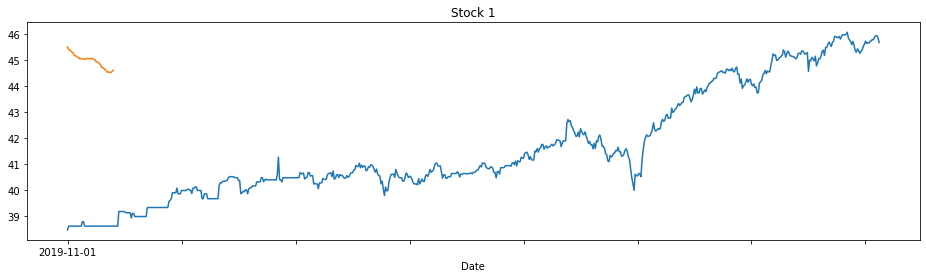

In [49]:
STOCK_NO = 1
fltr = train['stock']==STOCK_NO
fltr_tst = test['stock'] == STOCK_NO

ax = train[fltr].set_index('Date')['Close'].plot(figsize=(16,4),title = f'Stock {STOCK_NO}')
_ = test[fltr_tst].set_index('Date')['Close'].plot(ax=ax)


In [32]:
test['Close'].isna().sum()

4182

In [14]:

d = {'y': train['Close'],'ds' : train['Date']}

df = pd.DataFrame(d)

from fbprophet import Prophet
model = Prophet()
model.fit(df)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
d = {'ds' : test['Date']}
future = pd.DataFrame(d)
forecast = model.predict(future)
forecast.head

/Users/rgarzon/anaconda3/envs/vinya/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of              ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2019-11-01  84.607878   40.531527  122.093601    84.607878    84.607878   
1    2019-11-01  84.607878   39.695412  126.013170    84.607878    84.607878   
2    2019-11-01  84.607878   34.335583  121.007424    84.607878    84.607878   
3    2019-11-01  84.607878   39.831266  122.025462    84.607878    84.607878   
4    2019-11-01  84.607878   39.012476  123.037745    84.607878    84.607878   
...         ...        ...         ...         ...          ...          ...   
4218 2019-12-31  85.646967   42.414971  121.372163    85.268303    86.110556   
4219 2019-12-31  85.646967   38.658714  121.110870    85.268303    86.110556   
4220 2019-12-31  85.646967   39.442768  122.947097    85.268303    86.110556   
4221 2019-12-31  85.646967   37.978754  122.970082    85.268303    86.110556   
4222 2019-12-31  85.646967   41.964659  121.801811    85.268303    86.110556   

      add

In [17]:
forecast['yhat']

0       80.967926
1       80.967926
2       80.967926
3       80.967926
4       80.967926
          ...    
4218    80.621522
4219    80.621522
4220    80.621522
4221    80.621522
4222    80.621522
Name: yhat, Length: 4223, dtype: float64

In [50]:
download_preds(test['Close'],'fbprohet.csv')

/Users/rgarzon/anaconda3/envs/vinya/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
